In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

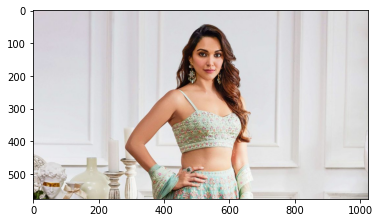

In [ ]:
filename = "kiara.jpg"
img = read_file(filename)

org_img = np.copy(img)

Create Edge Mask

In [ ]:
def edge_mask(img, line_size, blur_value):
  """ 
  Input: input Image
  output: Edges of Images
  """
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)

  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                cv2.THRESH_BINARY, line_size, blur_value)
  return edges



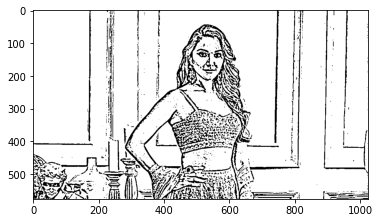

In [ ]:
line_size, blur_value = 9,3
edges =edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap= "gray")
plt.show()


Reduce the color palette

In [ ]:
def color_quantization(img, k):
  # Transform the image
  data = np.float32(img).reshape((-1,3))
  #Determine crieteria
  criteria= (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER, 20, 0.001)
  ## Implementing K-means
  ret, label, center= cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)

  result = center[label.flatten()]
  result = result.reshape(img.shape)

  return result

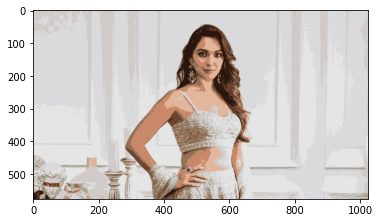

In [ ]:
img = color_quantization(img, k=9)
plt.imshow(img)
plt.show()

Reduce the noice

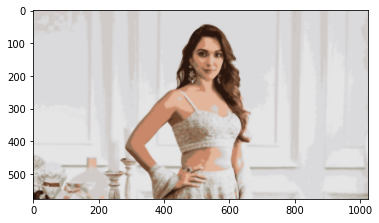

In [ ]:
blurred = cv2.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)

plt.imshow(blurred)
plt.show()

Combine Edge MAsk with the Quantiz img


In [ ]:
def cartoon():
  c= cv2.bitwise_and(blurred, blurred, mask= edges)

  plt.imshow(c)
  plt.title("Cartoon Image")
  plt.show()

  plt.imshow( org_img)
  plt.title("Original Image")
  plt.show()

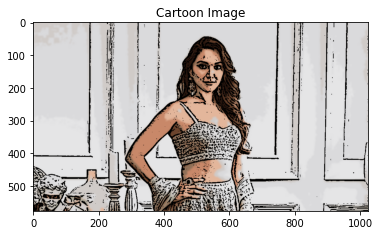

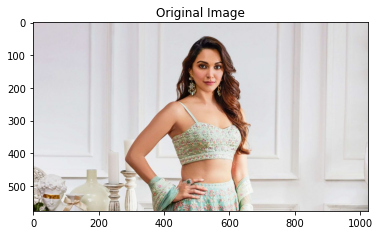

In [ ]:
cartoon()